In [9]:
import numpy as np
import math
from astropy import units as u
from astropy.coordinates import SkyCoord, match_coordinates_sky
import astropy.coordinates as coord
from astropy.cosmology import FlatLambdaCDM
from astropy.table import Table
from astropy.io import fits
import time
from numpy.lib.recfunctions import append_fields
from astropy.cosmology import FlatLambdaCDM,Planck15
import sys
from time import gmtime, strftime

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline


In [2]:
from halotools.empirical_models import PrebuiltHodModelFactory, PrebuiltSubhaloModelFactory
from halotools.mock_observables import return_xyz_formatted_array
from halotools.mock_observables import wp
from halotools.sim_manager import CachedHaloCatalog
from scipy import interpolate


In [4]:
#import halotools
#halotools.test()

In [3]:
import halotools

In [4]:
#from halotools.sim_manager import DownloadManager
#dman = DownloadManager()
#dman.download_processed_halo_table('bolshoi', 'rockstar', 0.5) 
#dman.download_processed_halo_table('bolshoi', 'rockstar', 0) 
### NOTE: bolshoi=WMAP5 cosmology with Lbox = 250 Mpc/h and particle mass of ~1e8 Msun/h.
### NOTE: bolplanck=Planck 2013 cosmology with Lbox = 250 Mpc/h and particle mass of ~1e8 Msun/h.

In [5]:
halocat = CachedHaloCatalog(simname = 'bolshoi', redshift = 0., halo_finder = 'rockstar')
halos = halocat.halo_table


In [6]:
x = halos['halo_x']
y = halos['halo_y']
z = halos['halo_z']
all_positions = return_xyz_formatted_array(x, y, z)
rpbins = np.array([1,3,6,8,10,15,20,30,40,50,60])

wdm = wp(all_positions, rpbins, 60,period=halocat.Lbox, num_threads=4)

/Users/ccardamone/anaconda/lib/python3.5/site-packages/halotools/mock_observables/two_point_clustering/clustering_helpers.py:134: UserWarning: 
 `sample1` exceeds `max_sample_size` 
downsampling `sample1`...
  warn(msg)


In [16]:
halocat = CachedHaloCatalog(simname = 'bolshoi', redshift = 0.5, halo_finder = 'rockstar')
halos = halocat.halo_table


In [17]:
x = halos['halo_x']
y = halos['halo_y']
z = halos['halo_z']
all_positions = return_xyz_formatted_array(x, y, z)
rpbins = np.array([1,3,6,8,10,15,20,30,40,50,60])

wdm5 = wp(all_positions, rpbins, 60,period=halocat.Lbox, num_threads=4)

/Users/ccardamone/anaconda/lib/python3.5/site-packages/halotools/mock_observables/two_point_clustering/clustering_helpers.py:134: UserWarning: 
 `sample1` exceeds `max_sample_size` 
downsampling `sample1`...
  warn(msg)


In [20]:
np.save('output/bolshoi_0_wp_dm.npy',wdm)
np.save('output/bolshoi_0.5_wp_dm.npy',wdm5)
np.save('output/bolshoi_rp_used.npy',rpbins)

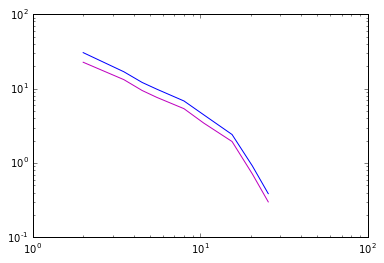

In [19]:
rp_bin_centers = (rpbins[:1] + rpbins[1:])/2.

plt.loglog(rp_bin_centers,wdm)
plt.loglog(rp_bin_centers,wdm5,color='m')


In [15]:
print(wdm)
rpbins

[ 30.51441626  16.87175972  12.12543956   9.8556689    6.83392563
   4.45280993   2.41952342   0.91446521   0.38812959  -0.03417333]


array([ 1,  3,  6,  8, 10, 15, 20, 30, 40, 50, 60])